<a href="https://colab.research.google.com/github/Hesprmic/deep-learning-challenge/blob/main/AlphabetSoupCharity_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [60]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [61]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

In [62]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [63]:
# Look at APPLICATION_TYPE value counts for binning
a_counts = application_df['APPLICATION_TYPE'].value_counts()
a_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [64]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(a_counts[a_counts < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [65]:
# Look at CLASSIFICATION value counts for binning
c_counts = application_df["CLASSIFICATION"].value_counts()
c_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [66]:
# You may find it helpful to look at CLASSIFICATION value counts >1
c_counts[c_counts>1000]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(c_counts[c_counts < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [67]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [68]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], axis='columns').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=48)

In [69]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [70]:
# I was curious what the RandomForest would like for accuracy.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.7083381924198251


## Compile, Train and Evaluate the Model

1st ATTEMPT

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
h1_1 = 15
h1_2 = 10


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_1, input_dim=num_input, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_2, activation="sigmoid")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                660       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 831 (3.25 KB)
Trainable params: 831 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5917 - accuracy: 0.7102
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5597 - accuracy: 0.7268
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5536 - accuracy: 0.7296
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7301
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7317
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7309
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5504 - accuracy: 0.7319
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5499 - accuracy: 0.7324
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5495 - accura

<Axes: >

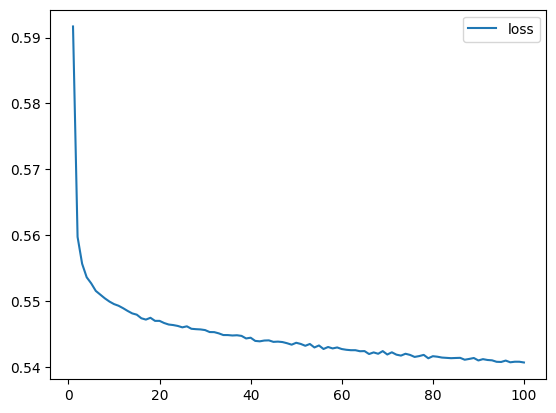

In [31]:
# Create a DataFrame containing training history for the 1st attempt
training_hist_1 = pd.DataFrame(fit_model.history)
training_hist_1.index += 1

# Plot the loss
training_hist_1.plot(y="loss")

<Axes: >

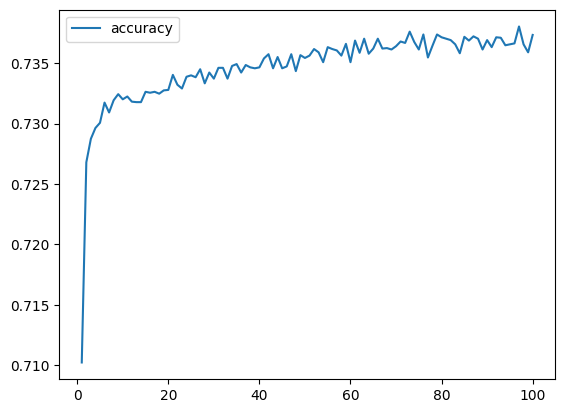

In [18]:
# Plot the accuracy
training_hist_1.plot(y="accuracy")

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5510 - accuracy: 0.7282 - 535ms/epoch - 2ms/step
Loss: 0.5510440468788147, Accuracy: 0.7281632423400879


In [20]:
nn.save_weights("AlphabetSoupCharity1.h5")

2nd ATTEMPT

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
h1_1 = 80
h1_2 = 32

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_1, input_dim=num_input, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_2, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 32)                2592      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6145 (24.00 KB)
Trainable params: 6145 (24.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
fit_model_2 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5704 - accuracy: 0.7233
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5558 - accuracy: 0.7297
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7285
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7308
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7324
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5485 - accuracy: 0.7329
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7320
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5473 - accuracy: 0.7336
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5470 - accuracy: 0.7328
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5470 - accura

<Axes: >

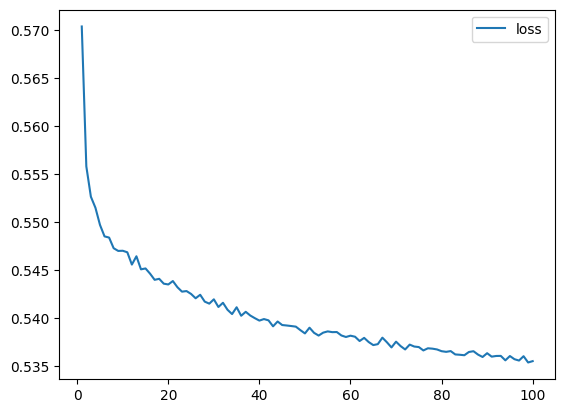

In [24]:
# Create a DataFrame containing training history for the 1st attempt
training_hist_2 = pd.DataFrame(fit_model_2.history)
training_hist_2.index += 1

# Plot the loss
training_hist_2.plot(y="loss")

<Axes: >

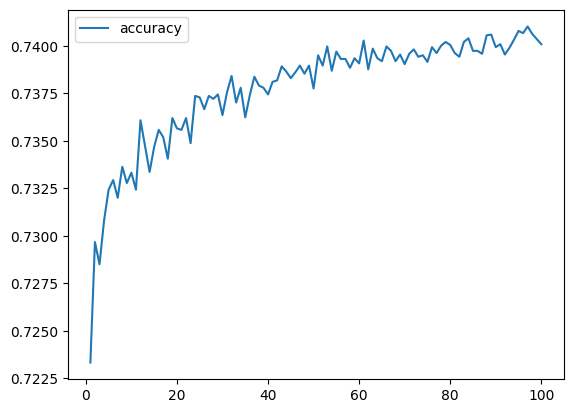

In [25]:
# Plot the accuracy
training_hist_2.plot(y="accuracy")

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5564 - accuracy: 0.7273 - 474ms/epoch - 2ms/step
Loss: 0.5563616156578064, Accuracy: 0.7273469567298889


In [27]:
nn.save_weights("AlphabetSoupCharity2.h5")

3rd ATTEMPT

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
h1_1 = 48
h1_2 = 32
h1_3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_1, input_dim=num_input, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_3, activation="sigmoid")
)


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 48)                2112      
                                                                 
 dense_11 (Dense)            (None, 32)                1568      
                                                                 
 dense_12 (Dense)            (None, 8)                 264       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3953 (15.44 KB)
Trainable params: 3953 (15.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_model_3 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5782 - accuracy: 0.7236
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5585 - accuracy: 0.7302
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5546 - accuracy: 0.7320
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5527 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5511 - accuracy: 0.7316
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7324
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7334
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5484 - accuracy: 0.7327
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.7330
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accura

<Axes: >

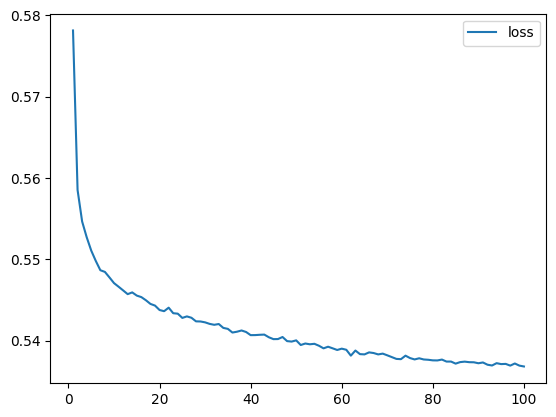

In [35]:
# Create a DataFrame containing training history for the 1st attempt
training_hist_3 = pd.DataFrame(fit_model_3.history)
training_hist_3.index += 1

# Plot the loss
training_hist_3.plot(y="loss")

<Axes: >

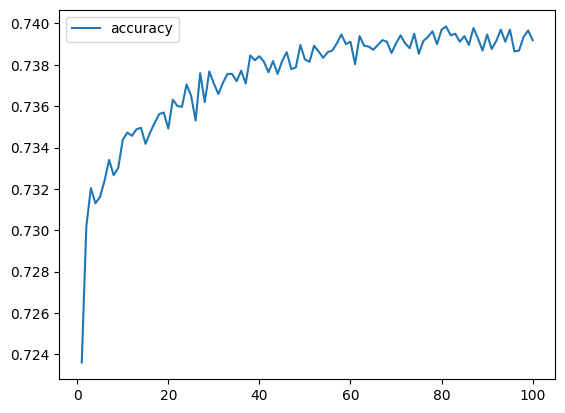

In [36]:
# Plot the accuracy
training_hist_3.plot(y="accuracy")

In [37]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5518 - accuracy: 0.7294 - 492ms/epoch - 2ms/step
Loss: 0.5518333911895752, Accuracy: 0.7294460535049438


In [38]:
nn.save_weights("AlphabetSoupCharity3.h5")

4th ATTEMPT

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
h1_1 = 128
h1_2 = 64
h1_3 = 32

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_1, input_dim=num_input, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_3, activation="sigmoid")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               5632      
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16001 (62.50 KB)
Trainable params: 16001 (62.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [41]:
# Train the model
fit_model_4 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.6771 - accuracy: 0.5768
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6234 - accuracy: 0.7059
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5796 - accuracy: 0.7224
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5673 - accuracy: 0.7271
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5631 - accuracy: 0.7283
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5604 - accuracy: 0.7296
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5584 - accuracy: 0.7302
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5569 - accuracy: 0.7312
Epoch 9/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5557 - accuracy: 0.7313
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5548 - accura

<Axes: >

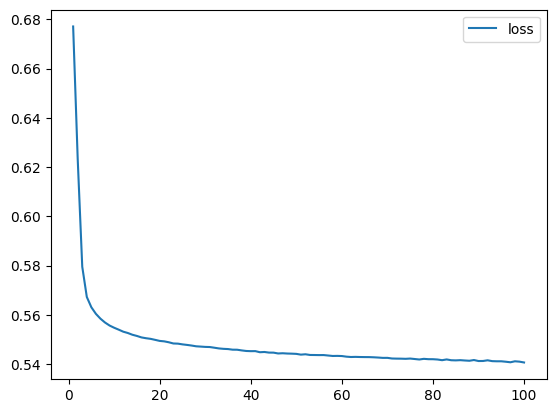

In [42]:
# Create a DataFrame containing training history for the 1st attempt
training_hist_4 = pd.DataFrame(fit_model_4.history)
training_hist_4.index += 1

# Plot the loss
training_hist_4.plot(y="loss")

<Axes: >

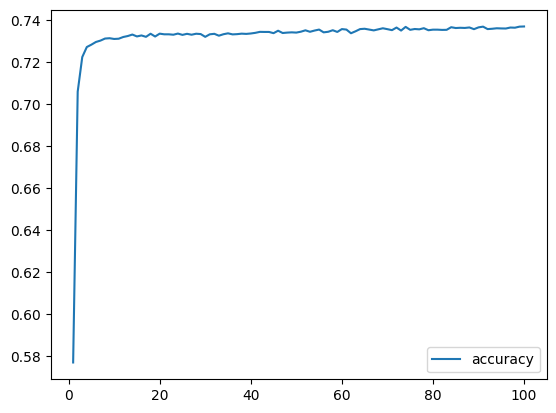

In [43]:
# Plot the accuracy
training_hist_4.plot(y="accuracy")

In [44]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5502 - accuracy: 0.7261 - 471ms/epoch - 2ms/step
Loss: 0.5501635670661926, Accuracy: 0.726064145565033


In [45]:
nn.save_weights("AlphabetSoupCharity4.h5")

5th ATTEMPT

In [83]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
h1_1 = 48
h1_2 = 32
h1_3 = 16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_1, input_dim=num_input, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_3, activation="sigmoid")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 48)                5232      
                                                                 
 dense_35 (Dense)            (None, 32)                1568      
                                                                 
 dense_36 (Dense)            (None, 16)                528       
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7345 (28.69 KB)
Trainable params: 7345 (28.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [85]:
# Train the model
fit_model_5 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5719 - accuracy: 0.7190
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5542 - accuracy: 0.7300
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5520 - accuracy: 0.7323
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5506 - accuracy: 0.7315
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5492 - accuracy: 0.7323
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5483 - accuracy: 0.7324
Epoch 7/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5475 - accuracy: 0.7329
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5471 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7339
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5462 - accura

<Axes: >

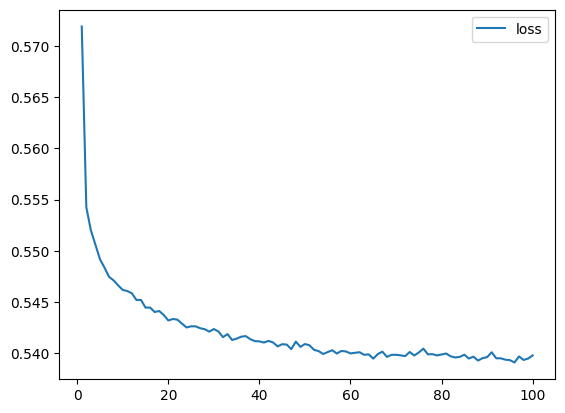

In [86]:
# Create a DataFrame containing training history for the 1st attempt
training_hist_5 = pd.DataFrame(fit_model_5.history)
training_hist_5.index += 1

# Plot the loss
training_hist_5.plot(y="loss")

<Axes: >

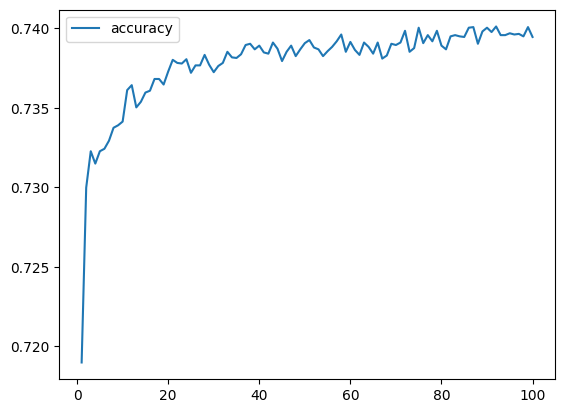

In [87]:
# Plot the accuracy
training_hist_5.plot(y="accuracy")

In [88]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5526 - accuracy: 0.7299 - 483ms/epoch - 2ms/step
Loss: 0.5525826811790466, Accuracy: 0.729912519454956


In [52]:
nn.save_weights("AlphabetSoupCharity5.h5")

6th ATTEMPT

In [89]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
h1_1 = 48
h1_2 = 32
h1_3 = 16

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_1, input_dim=num_input, activation="relu")
)

# Second hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_2, activation="relu")
)

# Third hidden layer
nn.add(
    tf.keras.layers.Dense(units=h1_3, activation="relu")
)

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 48)                5232      
                                                                 
 dense_39 (Dense)            (None, 32)                1568      
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7345 (28.69 KB)
Trainable params: 7345 (28.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [91]:
# Train the model
fit_model_6 = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5721 - accuracy: 0.7234
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5575 - accuracy: 0.7285
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7310
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5513 - accuracy: 0.7323
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5496 - accuracy: 0.7339
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5490 - accuracy: 0.7345
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5476 - accuracy: 0.7341
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7350
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7355
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5474 - accura

<Axes: >

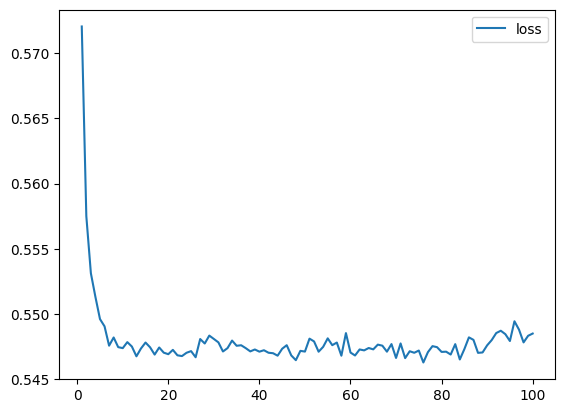

In [92]:
# Create a DataFrame containing training history for the 1st attempt
training_hist_6 = pd.DataFrame(fit_model_6.history)
training_hist_6.index += 1

# Plot the loss
training_hist_6.plot(y="loss")

<Axes: >

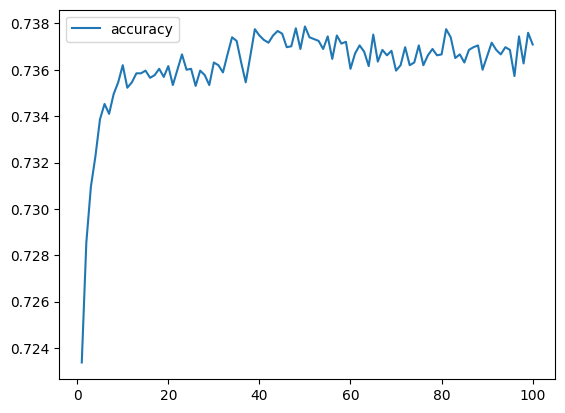

In [93]:
# Plot the accuracy
training_hist_6.plot(y="accuracy")

In [94]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5642 - accuracy: 0.7278 - 463ms/epoch - 2ms/step
Loss: 0.5641517043113708, Accuracy: 0.7278134226799011


In [59]:
# Export our model to HDF5 file
nn.save_weights("AlphabetSoupCharity6.h5")